##**About Aerofit**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

##**Product Portfolio**
* The KP281 is an entry-level treadmill that sells for $1,500.

* The KP481 is for mid-level runners that sell for $1,750.

* The KP781 treadmill is having advanced features that sell for $2,500.

##**Business Problem**
The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the
business.

In [ ]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##**Analyzing basic metrics**

In [ ]:
#fetching and reading the dateset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
df.shape

(180, 9)

Dataset contains 180 rows and 9 columns

In [ ]:
#using describe() method to make some basic observations
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


###**Observations**
All attributes have 180 instances
* Mean age of customer is 28.
* Minimum Age of the customer starts from 18 and maximum age is 50
* 25% of the customers age is 24
* 75% of the customer age is 33
* Maximum Education qualification is 21, with most frequent education as 16
* Average usage per week for a customer is 3 days
* Average Fitness rating is 3 with most common fitness rating is 4
* Average Income of the purchased customer is around 54K per year
* Highest salary recorded for the customer is around 104K per year
* Maximum distance covered by the customer in treadmill is 360 miles
* Most of the customers cover a distance of 114 miles with an average of 103 miles
* Around 25% of the customer cover an average of 66 miles


##**Introduction to the dataset**

In [ ]:
#number of products
df['Product'].nunique()

3

In [ ]:
#name of the products
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [ ]:
#number of unique ages
df['Age'].nunique()

32

In [ ]:
#list of unique ages
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
#number of male count and female count in customer base
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
#number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [ ]:
#number of single/partnered cutomers
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

###**Summary**
* KP281, KP481, KP781 are the 3 different products
* Most commonly purchased treadmill product type is KP281
* There are 32 unique ages
* 104 Males and 76 Females are in the customers list
* 8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)
* Highest rated Fitness rating is 3
* Most customers usage treadmill atleast 3 days per week
* Majority of the customers who have purchased are Married/Partnered

##**Conversion of categorical attributes to 'category'**

In [ ]:
#Converting Int of Fitness to object data type
dfcat = df
dfcat['FitnessCategory'] = df['Fitness']
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,FitnessCategory
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [ ]:
#Replacing int with appropriate str
dfcat['FitnessCategory'].replace({1:"Poor Shape",
                               2: "Bad Shape",
                               3: "Average Shape",
                               4: "Good Shape",
                               5: "Excellent Shape"}, inplace=True)
dfcat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,FitnessCategory
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


##**Statistics**

In [ ]:
#relative count of unique products bought
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

* **44%** of customers bought KP281. (entry-level treadmill that sells for $1500)

* **33%** of customers bought KP481. (for mid-level runners that sell for $1750)

* **22%** of customers bought KP781. (advanced features treadmill that sell for $2500)

In [ ]:
#relative count of gender(male/female) in conusmer base
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

* **57.7%** of total customers are **Male**
* **42.3%** of total customers are **Female**

In [ ]:
#relative count of single/married cutomers
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

* **59.4%** of customers are married/partnered and **40.6%** of cutomers are single

In [ ]:
#relative comparison of number of days used per week
usage = df['Usage'].value_counts(normalize=True).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,DaysPerWeek,Usage
0,3,0.383333
1,4,0.288889
2,2,0.183333
3,5,0.094444
4,6,0.038889
5,7,0.011111


* **Approx 39%** of the people use it 3 days per week
* **Less than 2%** of the people use it whole week

In [ ]:
#relative comparison of fitness state of customers
rating = df['Fitness'].value_counts(normalize=True).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Rating,Fitness
0,3,0.538889
1,5,0.172222
2,2,0.144444
3,4,0.133333
4,1,0.011111


* **More than 53%** of customers have rated themselves as average in fitness (rated 3)

* **14%** of customers have rated their fitness less than average
* **Over 17%** of customers have peak fitness ratings

##**Visual Analysis - Univariate**

<Axes: xlabel='Product', ylabel='count'>

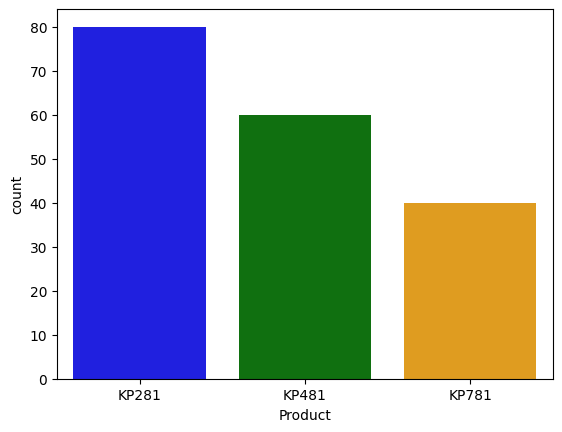

In [ ]:
#product analysis - count plot
sns.countplot(data=df,x='Product',palette=['blue', 'green', 'orange'])

* KP281 is the most purchased product
* KP481 is second most purchased product
* KP781 is the least purchased product

<Axes: xlabel='Gender', ylabel='count'>

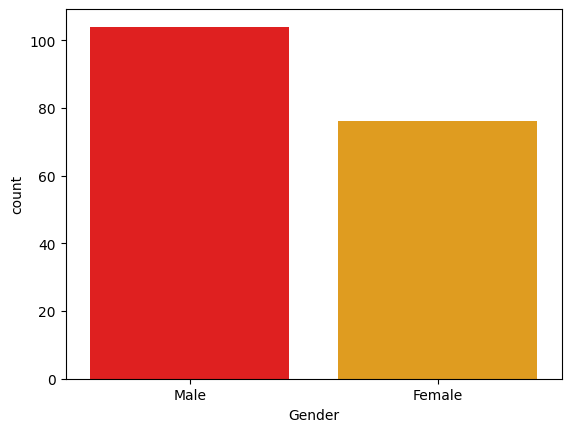

In [ ]:
#gender analysis - count plot
sns.countplot(data=df, x='Gender', palette=['red','orange'])

* Most products are purchased by males, females are usually less interested in products of fitness category

<Axes: xlabel='MaritalStatus', ylabel='count'>

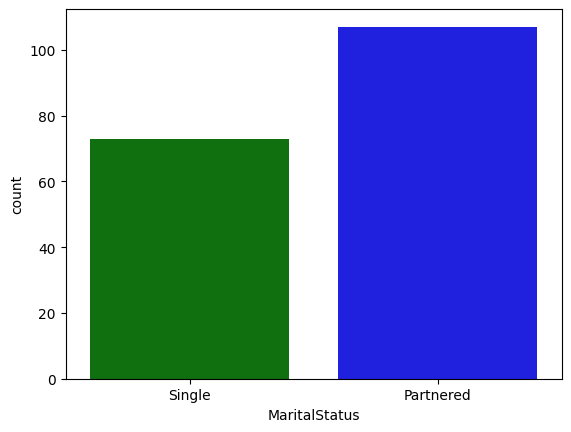

In [ ]:
#marital status analysis - count plot
sns.countplot(data=df, x='MaritalStatus', palette=['green', 'blue'])

* Most of the products are purchased by partnered category

<Axes: xlabel='Usage', ylabel='count'>

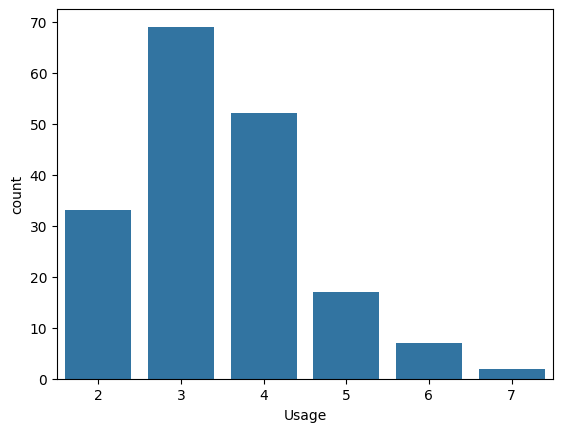

In [ ]:
#usage analysis - count plot
sns.countplot(data=df, x='Usage')

* Most people uses the product 3 days a week
* Very less numebr of people use it everyday

<Axes: xlabel='Fitness', ylabel='count'>

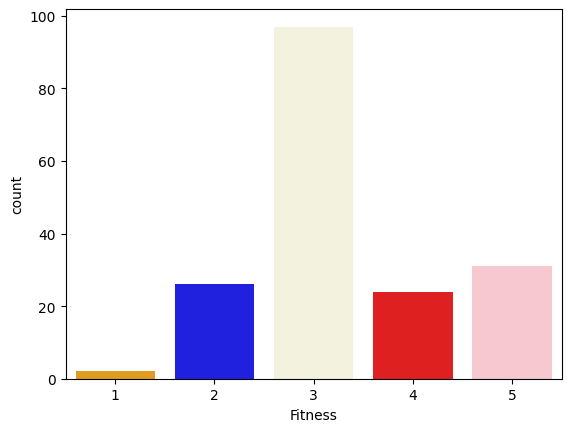

In [ ]:
#fitness analysis - count plot
sns.countplot(data=df, x = 'Fitness', palette=['orange','blue','beige','red','pink'])

* Avg fitness rating is 3 among the customers
* Second highest rating is 5

<Axes: xlabel='Income', ylabel='Density'>

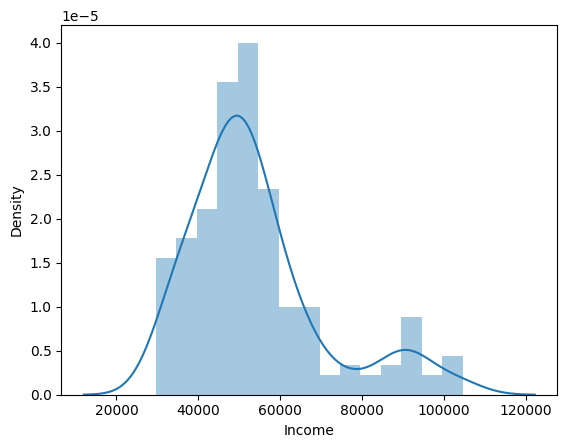

In [ ]:
#income analysis - distplot
sns.distplot(df.Income)

* Most of customers who have purchased the product have a average income between 40K to 60K
* Average Income density is over 3.0

<Axes: xlabel='Fitness', ylabel='Density'>

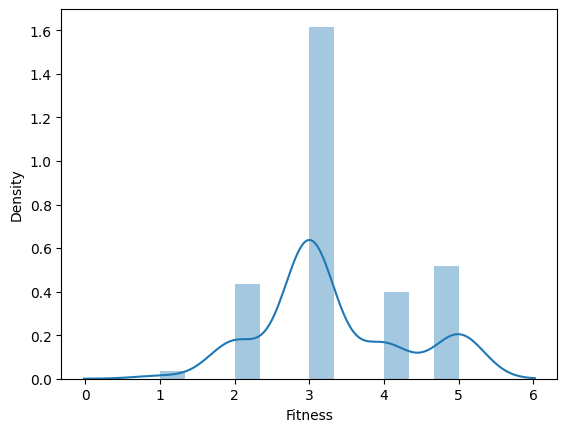

In [ ]:
#fitness analysis - distplot
sns.distplot(df.Fitness)

* The population density of customers who rated their physical fitness as average is over 1.5.
* Second-highest population density rated their fitness as excellent.

<Axes: xlabel='Income', ylabel='Count'>

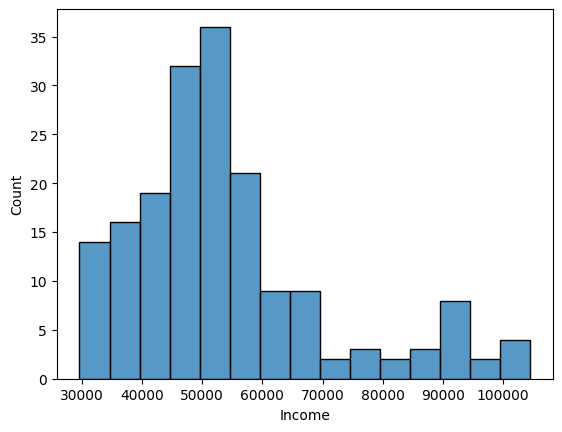

In [ ]:
#income analysis - histogram
sns.histplot(data=df, x='Income')

* Very less people in customer base earns more than 70k per year
* More than 35 customers earns 50-55K per annum
* More than 30 customers earns 45-50K per annum

<Axes: xlabel='Education', ylabel='Count'>

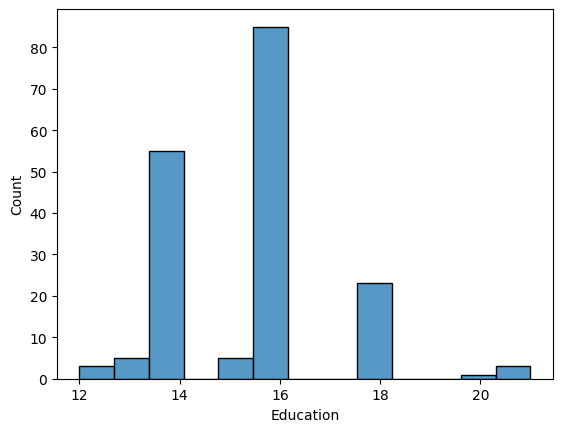

In [ ]:
#education analyis - histogram
sns.histplot(data=df, x='Education')

* More than 80 customers have their Education as 16
* Second highest Education among the customer is 14
* Least number of customer have their Education as 20

<Axes: xlabel='Fitness', ylabel='Count'>

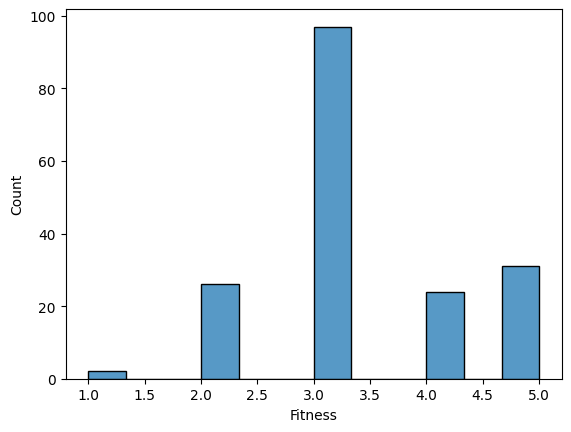

In [ ]:
#fitness anaylysis - histogram
sns.histplot(data=df,x='Fitness')



* Average shape is the most rating customers have given for fitness rating
* Around 40 customers have stated Excelled Shape as fitness rating

**For categorical variables: Boxplot**

<Axes: xlabel='Usage'>

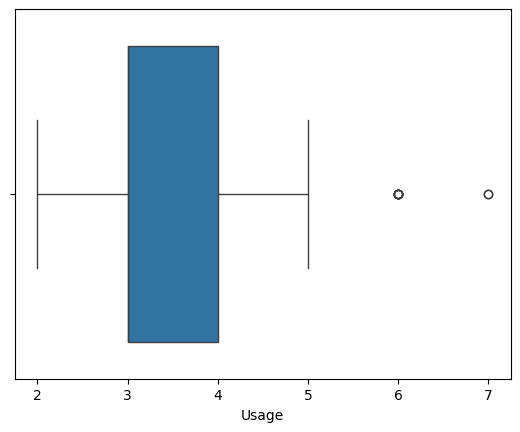

In [ ]:
#usage analysis - boxplot
sns.boxplot(data=df, x='Usage')

* 3 to 4 days is the most preferred usage days for customers
* 6 and 7 days per week **(Outliers)**

<Axes: xlabel='Age'>

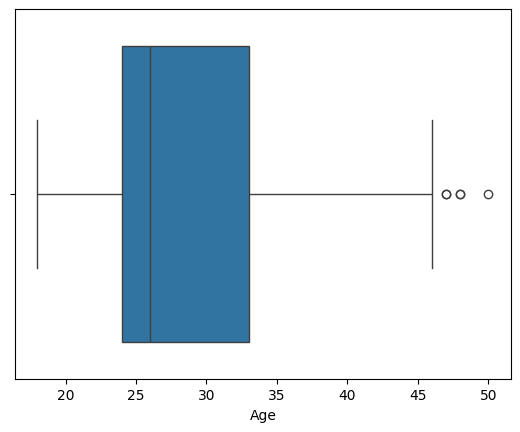

In [ ]:
#age analysis - boxplot
sns.boxplot(data=df, x='Age')

* 23 to 34 is the most common customer age group that has purchased the product
* Above 45 years old customers are very few **(Outliers)**

<Axes: xlabel='Income'>

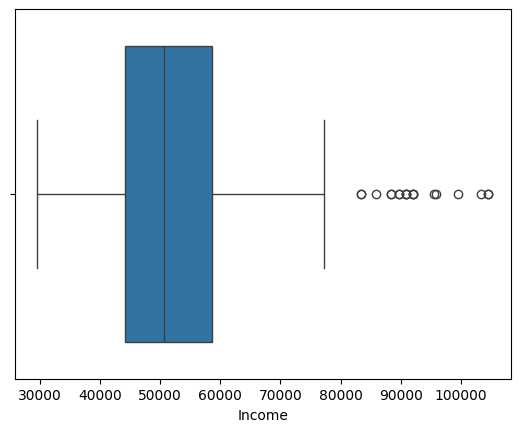

In [ ]:
#income analysis - boxplot
sns.boxplot(data=df, x='Income')

* Few customers have income above 80K per annum **(Outliers)**
* Most customers earn from 45K to around 60K per annum

<Axes: xlabel='Fitness'>

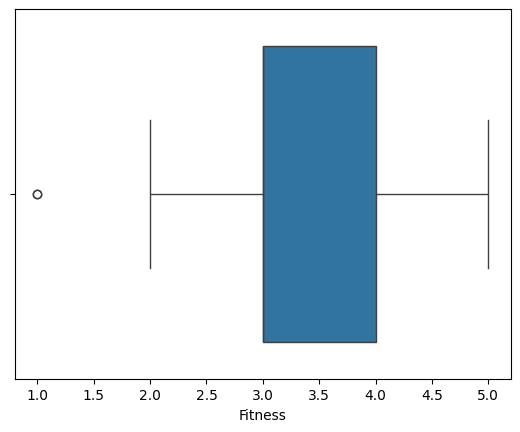

In [ ]:
#fitness rating analysis - boxplot
sns.boxplot(data=df, x='Fitness')

* Most people have fitness rating of range 3 to 4
* Very few people are rated as 1 - Poor Shape **(Outliers)**

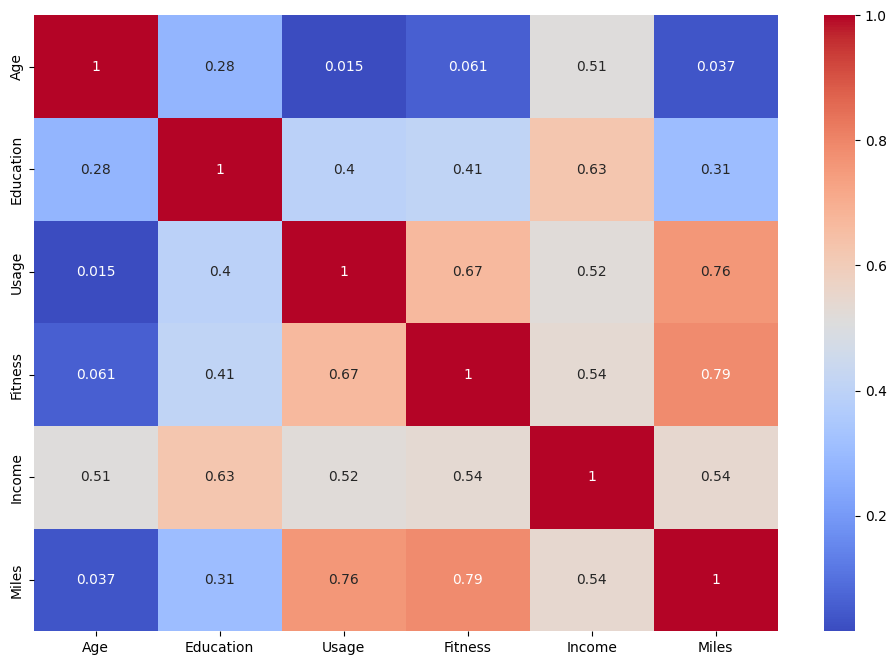

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

* Age and Miles: There is almost no linear relationship between a person's age
and the number of miles they typically run.
* Education and Income: There is a moderate to strong positive relationship between education level and income, suggesting that higher education is associated with higher income.
* Usage and Fitness: There is a moderate to strong positive relationship between equipment usage and fitness level, indicating that higher usage is associated with higher fitness.
* Fitness and Age: There is almost no linear relationship between a person's fitness level and their age.
* Income and Usage: There is a moderate positive relationship between income and equipment usage, suggesting that higher income is associated with higher equipment usage.

##**Visual Analysis - Bivariate**

<Axes: xlabel='Product', ylabel='count'>

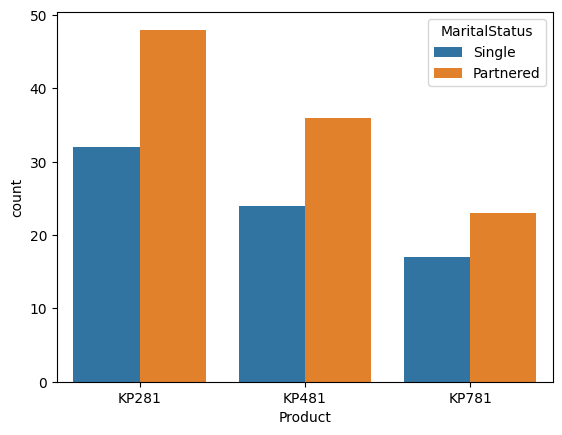

In [ ]:
# Product purchased among Married/Partnered and Single
sns.countplot(data=df,x='Product',hue='MaritalStatus')

* KP281 is the most purchased one among the customers
* Partnered customers are the major product purchaser

<Axes: xlabel='Product', ylabel='count'>

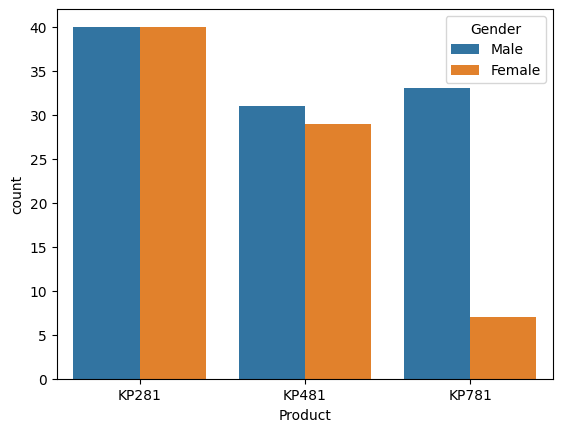

In [ ]:
#Gender of people who purchased which product
sns.countplot(data=df,x='Product',hue='Gender')

* Males and female are equally likely to purchase KP281 and KP481
* Advance Treadmill is mostly purchased by males

<Axes: xlabel='MaritalStatus', ylabel='count'>

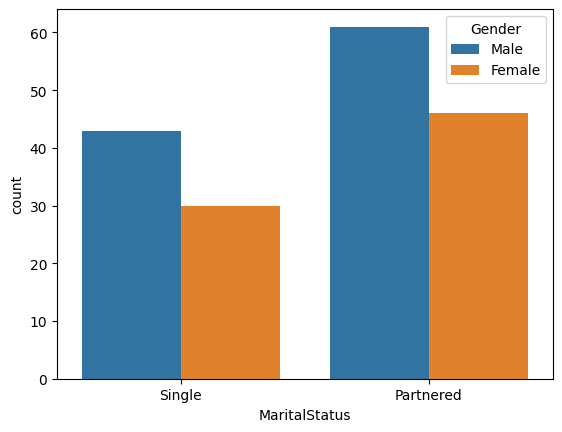

In [ ]:
#count among gender and marital status
sns.countplot(data=df,x='MaritalStatus',hue='Gender')

* Partnered customers are in majority
* Out of single and partnered customers, males are likely to buy product
* Female customers are low as compared to male customers

<Axes: xlabel='Income'>

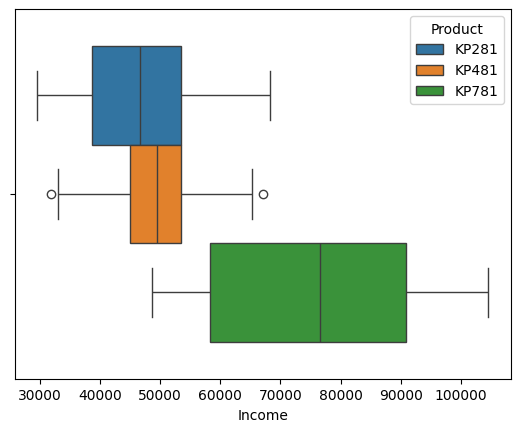

In [ ]:
#relation between income and product purchased
sns.boxplot(data=df,x='Income',hue='Product')

* People having income in range of 35-55K per annum purchased KP281 and KP481
* KP781 is purchased my customer having income more than 60K per annum

<Axes: xlabel='Usage', ylabel='count'>

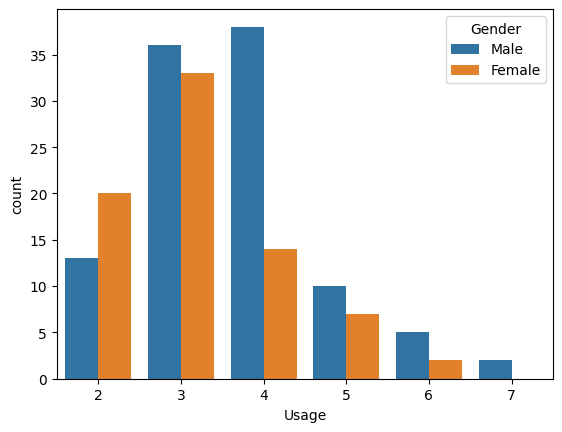

In [ ]:
#usage among gender
sns.countplot(data=df,x='Usage',hue='Gender')

* Most of the males tends to use 4 days per week
* Females use it 3 days per week
* Only few male customers uses it 7 days per week, but female customer use it for max 6 days per week

<Axes: xlabel='Usage', ylabel='count'>

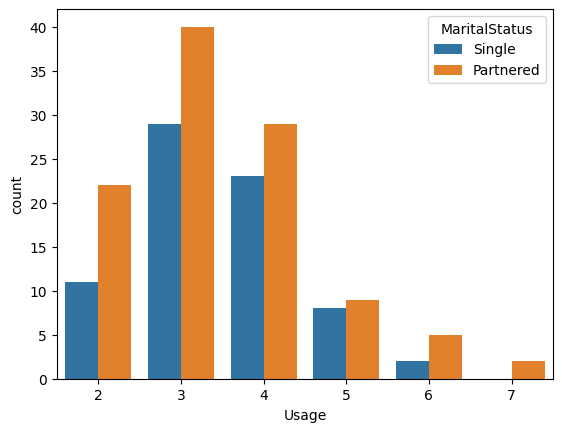

In [ ]:
#relation between usage and marital status
sns.countplot(data=df,x='Usage',hue='MaritalStatus')

* Single people use it for max 6 days per week whereas few partnered customer use it 7 days per week
* Mostly customers use it for 3-4 days per week, irrespective of their marital status
* Partnered customers are the majority users of the product

<Axes: xlabel='Fitness', ylabel='count'>

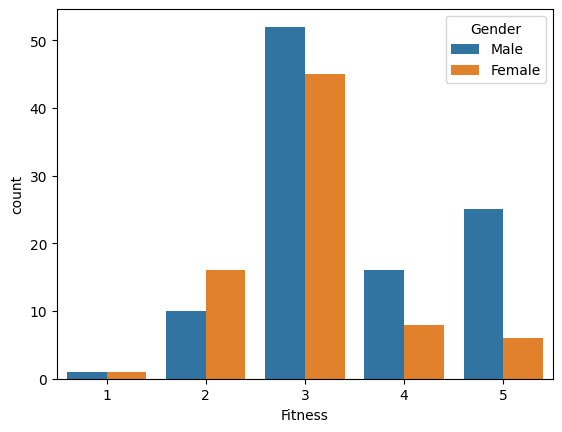

In [ ]:
# Fitness rating among the customers categorised by Gender
sns.countplot(data=df,x='Fitness',hue='Gender')

* Among the fitness rating both Male and Female most have rated as average
* Significant number of Male customers are at Excellent shape compared to Female customers

<Axes: xlabel='Age', ylabel='Product'>

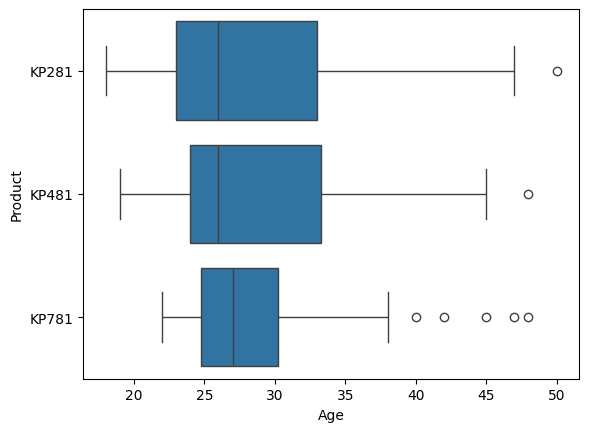

In [ ]:
#
sns.boxplot(x='Age',y='Product',data=df)

* Roughly few customers with age above 40 use product KP781
* Most of the customers are comfortable with KP281 product type
* KP481 is the second highest popular product among the younger side of the customer

<Axes: xlabel='Miles', ylabel='Product'>

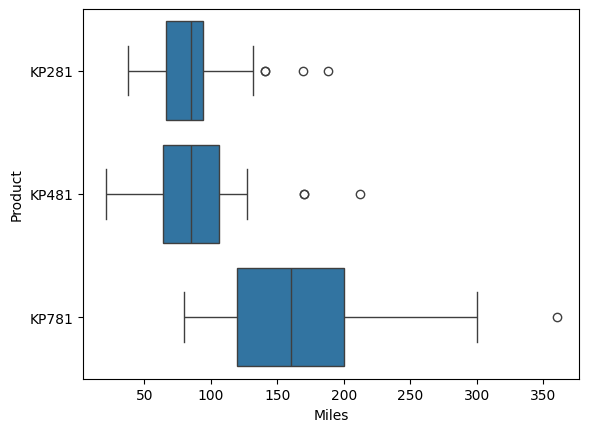

In [ ]:
sns.boxplot(x='Miles',y='Product',data=df)

* Customers with product KP781, has been able to cover more miles than other two product types
* KP481 product is the second most highest miles covering product among the customers
* KP281 product customer had covered less distance compared with other two product types

<Axes: xlabel='Education', ylabel='Product'>

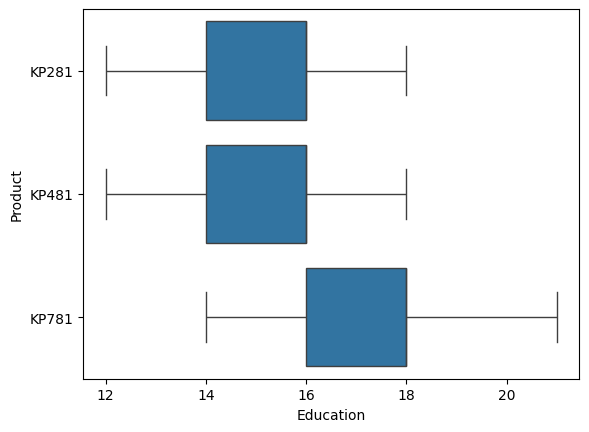

In [ ]:
sns.boxplot(x='Education',y='Product',data=df)

* Customers with Higher education of 16 to 18 have preferred mostly product type KP781
* Customers with education between 14 to 16 prefer KP281 and KP481 equally

##**Conditional and Marginal Probabilities**

###**Marginal Probabilities**

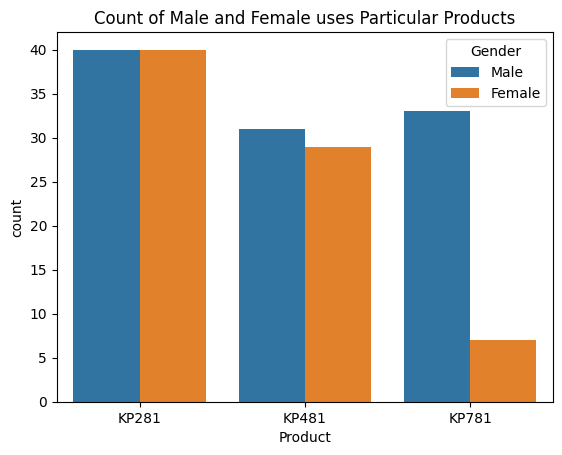

In [ ]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [ ]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


#####**Marginal Probability**

* Probability of Male Customer Purchasing any product is : 57.77 %

* Probability of Female Customer Purchasing any product is : 42.22 %

#####**Marginal Probability of any customer buying**

* product KP281 is : 44.44 % (cheapest / entry level product)

* product KP481 is : 33.33 % (intermediate user level product)

* product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)







###**Conditional Probabilities**

In [ ]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


#####**Probability of Selling Product**

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

* Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

* KP281 is more recommended for female customers.

* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

* Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

* KP481 product is specifically recommended for Female customers who are intermediate user.

##**Customer Profiling**

**KP281**
* Affordable, entry level product. Most seeling product in the portfolio
* Yound and Elder age group prefers this product
* Income range between 35K-55K preferred this product
* Avg usage is 3-4 times per week
* Easily affordable by both male and female customers
* Single female & Partnered male customers bought this product more than single male customers.

**KP481**
* Intermediate level product
* Fitness level of customers who purchased this product varies from bad to average
* Avg usage of this product is 3 days per week
* Most partnered customers preferred this product
* More females preferred this product than males
* Probability of buying this product of female customer is significabtly higher than male customer
* 24-34 years age group preffered this product
* Average Income of the customer who buys KP481 is 49K

**KP781**
* High price, advanced features, less popular among general audience
* People who uses this product have excellent shape as fitness rating
* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%)
* Average Income of KP781 buyers are over 75K per annum
* This product is preferred by the customer where the correlation between Education and Income is High
* Customers use 4 to 5 times a week at least

##**Recommendations**


* There is a low preference among females for exercise equipment. Therefore, we should launch a marketing campaign to encourage more women to exercise
* Customer who is Partnered, is more likely to purchase the product. We need to do more survey why singles are not purchasing more and any discounts needed.
* As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.

* KP781 product should be promotted using influencers and other international atheletes

* Offer customer support and suggest upgrading to the next level versions after users have consistently used lower versions
* Target the Age group above 40 years to recommend Product KP781 because people having purchasing power for this product are majorly from 30+ age group
* KP281 is the most purchased product, therefor ensure that it doesn't get out of stock